In [804]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [805]:
# importing dataset

data1=pd.read_csv("dataset/CAR DETAILS FROM CAR DEKHO.csv")
data1.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [806]:
data1.shape

(4340, 8)

In [807]:
data1.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [808]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [809]:
data1['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [810]:
data1['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [811]:
data1['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [812]:
data1.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [813]:
# Observations
# name of the car brand can be more precise by triming the name
# Owner is a ordinal column so in preprocessing step i would convert to number using OrdinalEncoder because a order is mentioned
# transmission column can also be encoded using label encoder because no order is mentioned

In [814]:
import re
def extract_base_name(name):
    # Extract first two tokens (handling multi-word like 'Wagon R')
    match = re.match(r'^([A-Za-z]+(?: [A-Za-z0-9]+)?)', name)
    return match.group(1) if match else name

data1['name'] = data1['name'].apply(extract_base_name)

In [815]:
data1.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio,2017,365000,78000,CNG,Individual,Manual,First Owner


<Axes: xlabel='selling_price', ylabel='Density'>

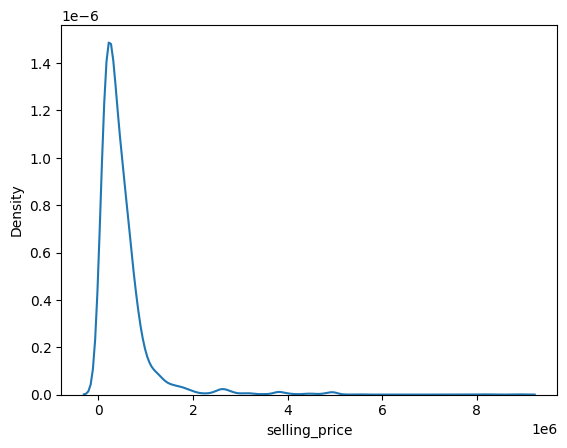

In [816]:
sns.kdeplot(data1['selling_price'])

In [817]:
data1.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio,2017,365000,78000,CNG,Individual,Manual,First Owner


In [818]:
mean_selling_price = data1['selling_price'].mean()
median_selling_price = data1['selling_price'].median()
print(f"Mean: {mean_selling_price}, Median: {median_selling_price}")

Mean: 504127.3117511521, Median: 350000.0


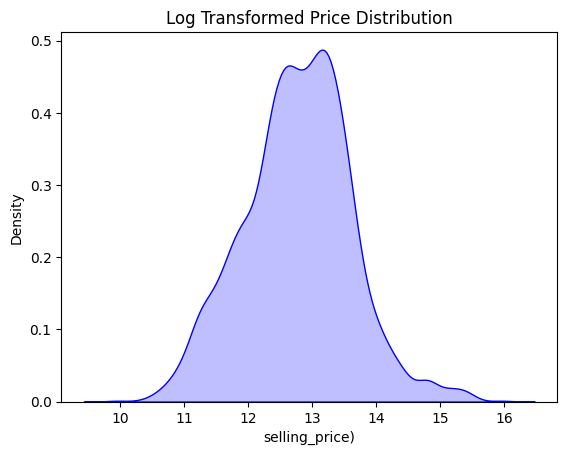

In [819]:
#clearly selling price is right skewed distribution as mean > median that means it has outliers
# Lets find what are those outliers

# here i am using log transformation to reduce the effect of right skewness
# Log transformation helps stabilizing the variance and make the distribution more symmetrical

data1['selling_price']=np.log(data1['selling_price'])

# Transformed Distribution
sns.kdeplot(data1['selling_price'], fill=True, color='blue')
plt.title("Log Transformed Price Distribution")
plt.xlabel("selling_price)")
plt.show()

<Axes: xlabel='transmission', ylabel='count'>

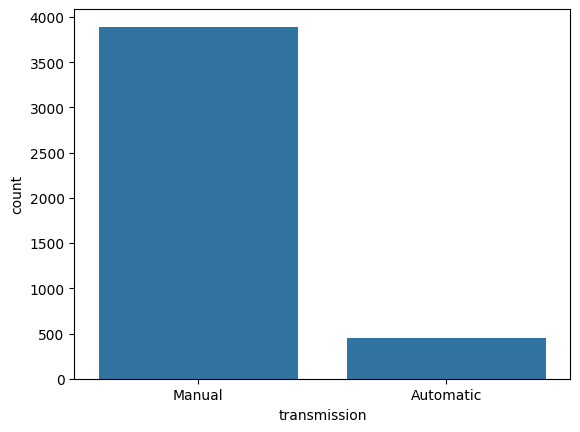

In [820]:
# Now lets plot some graph to understand the relationship between the data 
sns.countplot(x='transmission', data=data1)


<Axes: xlabel='year', ylabel='Count'>

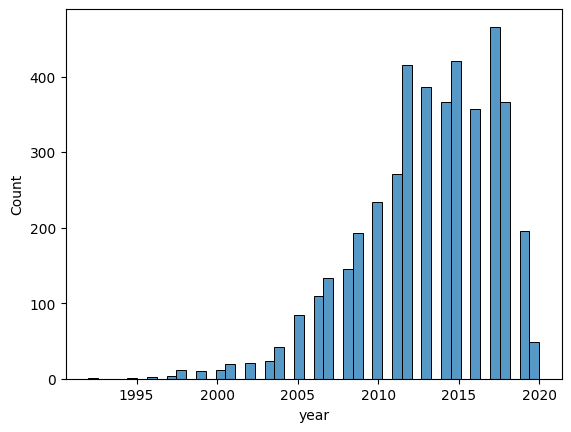

In [821]:
sns.histplot(data1['year'])

<Axes: xlabel='fuel', ylabel='Count'>

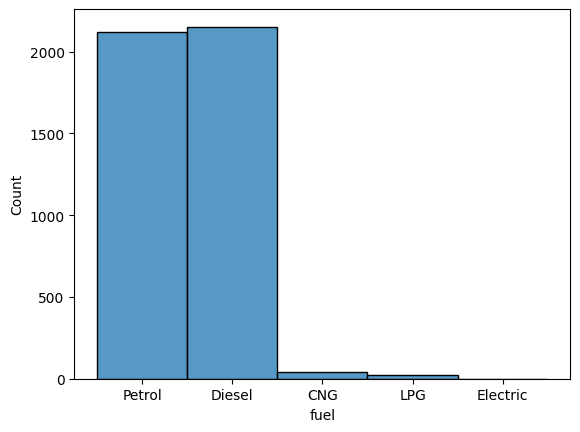

In [822]:
sns.histplot(data1['fuel'])

In [823]:
# Value for electric was so low ,made me check the value count 
data1['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

<Axes: xlabel='seller_type', ylabel='Count'>

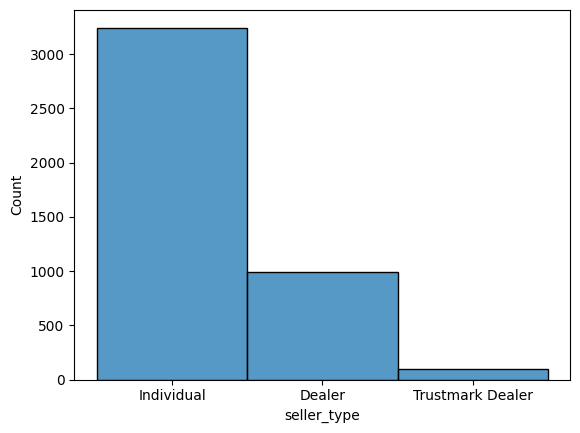

In [824]:
sns.histplot(data1['seller_type'])

<Axes: xlabel='km_driven', ylabel='Count'>

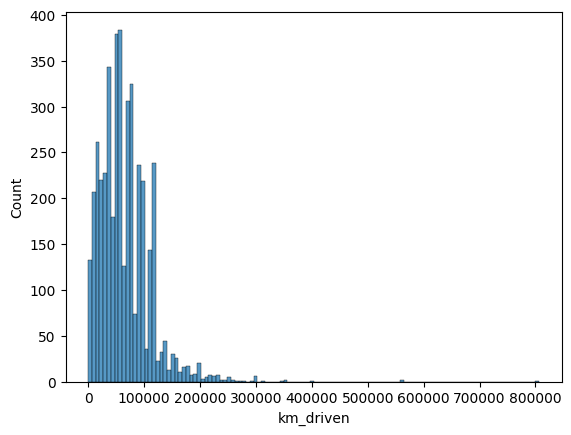

In [825]:
sns.histplot(data1['km_driven'])

In [826]:
from sklearn.preprocessing import OrdinalEncoder

# Define the custom ordinal order
owner_order = [['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']]

# Create and fit the encoder
encoder = OrdinalEncoder(categories=owner_order)
data1['owner_encoded'] = encoder.fit_transform(data1[['owner']])


In [827]:
data1.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,owner_encoded
0,Maruti 800,2007,11.002100,70000,Petrol,Individual,Manual,First Owner,0.0
1,Maruti Wagon,2007,11.813030,50000,Petrol,Individual,Manual,First Owner,0.0
2,Hyundai Verna,2012,13.304685,100000,Diesel,Individual,Manual,First Owner,0.0
3,Datsun RediGO,2017,12.429216,46000,Petrol,Individual,Manual,First Owner,0.0
4,Honda Amaze,2014,13.017003,141000,Diesel,Individual,Manual,Second Owner,1.0
5,Maruti Alto,2007,11.849398,125000,Petrol,Individual,Manual,First Owner,0.0
6,Hyundai Xcent,2016,13.217674,25000,Petrol,Individual,Manual,First Owner,0.0
7,Tata Indigo,2014,12.388394,60000,Petrol,Individual,Manual,Second Owner,1.0
8,Hyundai Creta,2015,13.652992,25000,Petrol,Individual,Manual,First Owner,0.0
9,Maruti Celerio,2017,12.807653,78000,CNG,Individual,Manual,First Owner,0.0


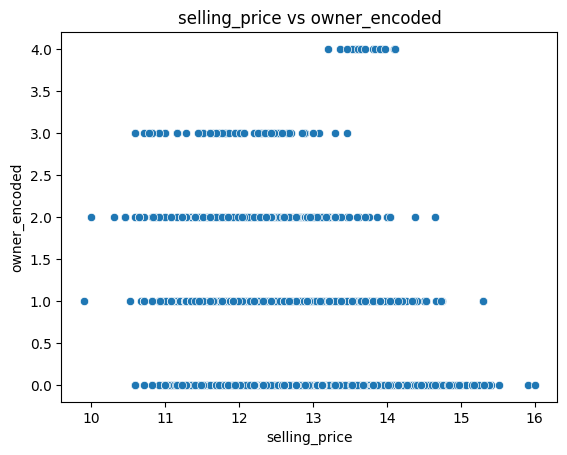

In [828]:
# Scatter plot
sns.scatterplot(x='selling_price', y='owner_encoded', data=data1)
plt.title('selling_price vs owner_encoded')
plt.xlabel('selling_price')
plt.ylabel('owner_encoded')
plt.show()

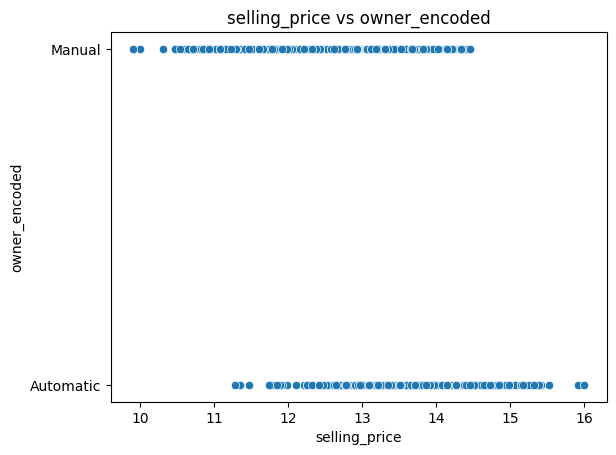

In [829]:
# Scatter plot
sns.scatterplot(x='selling_price', y='transmission', data=data1)
plt.title('selling_price vs owner_encoded')
plt.xlabel('selling_price')
plt.ylabel('owner_encoded')
plt.show()

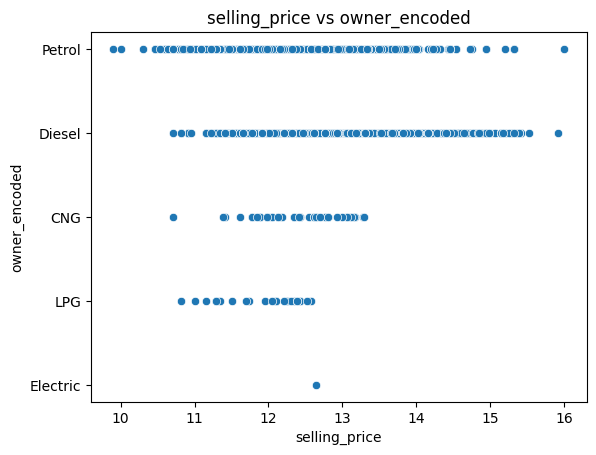

In [830]:
# Scatter plot
sns.scatterplot(x='selling_price', y='fuel', data=data1)
plt.title('selling_price vs owner_encoded')
plt.xlabel('selling_price')
plt.ylabel('owner_encoded')
plt.show()

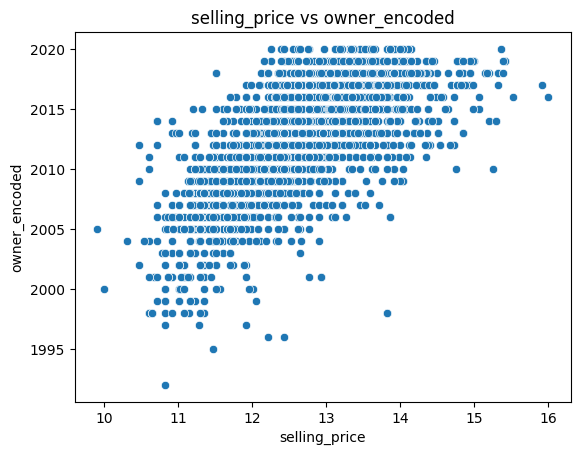

In [831]:
# Scatter plot
sns.scatterplot(x='selling_price', y='year', data=data1)
plt.title('selling_price vs owner_encoded')
plt.xlabel('selling_price')
plt.ylabel('owner_encoded')
plt.show()

Text(0, 0.5, 'selling_price')

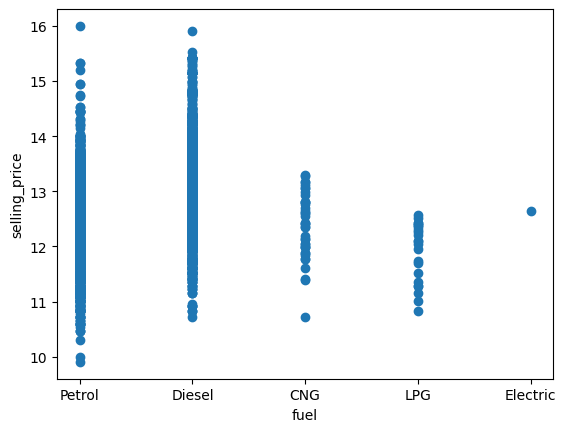

In [832]:
#let's plot and see how our data looks and how many stochastic error do we have 
plt.scatter(data1['fuel'],data1['selling_price'])
plt.xlabel('fuel')
plt.ylabel('selling_price')

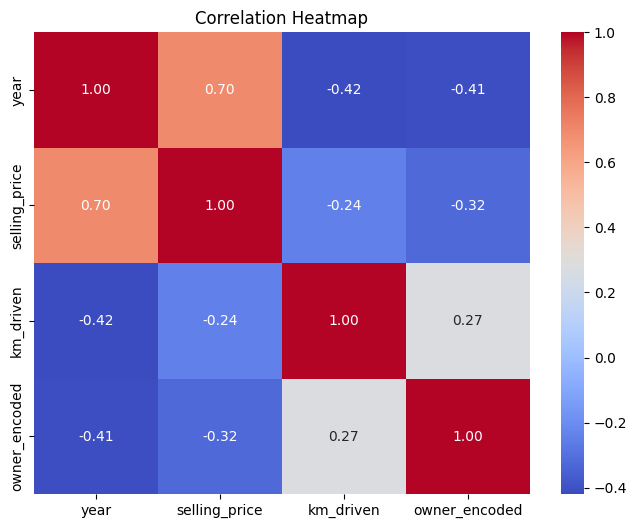

In [833]:
#check multicollinearity if High correlation values (e.g., > 0.8 or < -0.8) between features suggest potential multicollinearity.
# Heatmap
corr = data1.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [834]:
# Drop 'name' if it's too specific (like car model)
df = data1.drop(columns=['name'])

# One-Hot Encode the remaining categorical columns
df_encoded = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission','owner'], drop_first=True)

# Now use df_encoded for modeling
X = df_encoded.drop('selling_price', axis=1)  # replace 'target_column' with your actual label
y = df_encoded['selling_price']


In [835]:
#spliting data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=20,random_state=42)

In [836]:
X_train.shape, X_test.shape # check the shape of X_train and X_test

((4320, 14), (20, 14))

In [837]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [838]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 0.38
MSE: 0.25
R² Score: 0.62


In [839]:
# Coefficients & Intercept
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("Intercept:", model.intercept_)
print(coeff_df)


Intercept: -213.93411492569612
                         Feature   Coefficient
0                           year  1.128869e-01
1                      km_driven -3.991942e-07
2                  owner_encoded -9.076156e-04
3                    fuel_Diesel  5.849162e-01
4                  fuel_Electric  1.955411e-01
5                       fuel_LPG -5.000914e-02
6                    fuel_Petrol  7.386973e-02
7         seller_type_Individual -1.566749e-01
8   seller_type_Trustmark Dealer  3.060229e-01
9            transmission_Manual -8.042682e-01
10    owner_Fourth & Above Owner -1.361515e-01
11            owner_Second Owner -4.253889e-02
12          owner_Test Drive Car  1.689359e-01
13             owner_Third Owner -1.128290e-01


C:\Users\Priyanka\AppData\Local\Temp\ipykernel_42740\1006578992.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm')


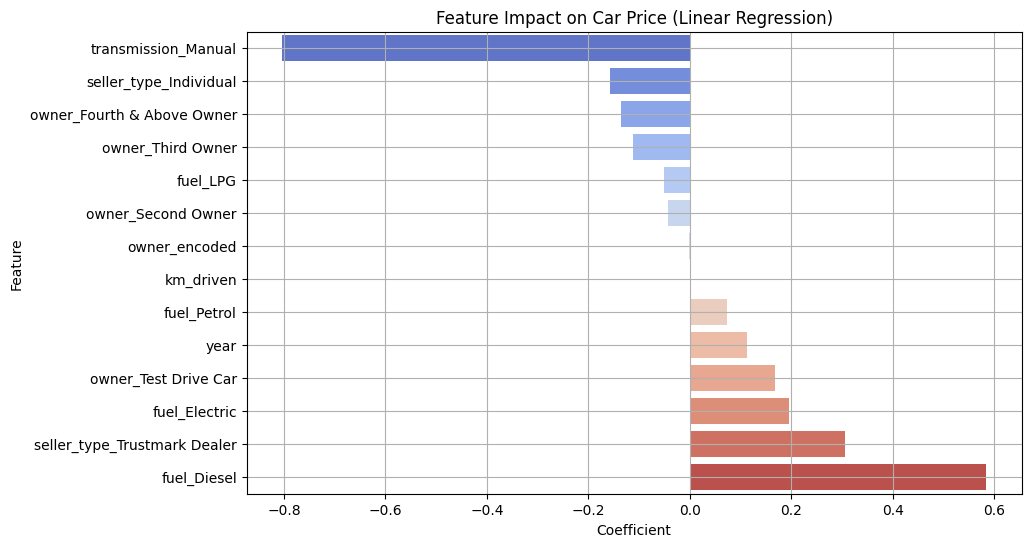

In [840]:
# Plot top positive and negative contributors
coeff_df = coeff_df.sort_values('Coefficient')
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm')
plt.title('Feature Impact on Car Price (Linear Regression)')
plt.grid(True)
plt.show()
